# Описание проекта
Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
лог сервера с данными об их посещениях,
выгрузка их покупок за этот период,
рекламные расходы.
Вам предстоит изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

# Описание данных
В вашем распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.
Структура visits_info_short.csv:
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.
- Структура orders_info_short.csv:
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.
- Структура costs_info_short.csv:
- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

<div class="alert alert-info">
    <h2> Мой комментарий_V1<a class="tocSkip"> </h2>
Приятно познакомиться, свои комментарии буду помечать вот так.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

# Шаг 1. Загрузите данные и подготовьте их к анализу

<div class="alert alert-info">
    <h2> Мой комментарий_V1<a class="tocSkip"> </h2>
    
<b>Описание проекта:</b>
Я — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Задача — разобраться в причинах и помочь компании выйти в плюс. <p>
        <b>Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года: </b><p>
лог сервера с данными об их посещениях, <p>
выгрузка их покупок за этот период, <p>
рекламные расходы. <p>
        <b>Вам предстоит изучить:</b><p>
откуда приходят пользователи и какими устройствами они пользуются, <p>
сколько стоит привлечение пользователей из различных рекламных каналов; <p>
сколько денег приносит каждый клиент, <p>
когда расходы на привлечение клиента окупаются, <p>
какие факторы мешают привлечению клиентов.
</div>
    

In [2]:
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    visits = pd.read_csv(r'C:\all\Study\Practicum\Module_2\Analysis of business indicators\Project\visits_info_short.csv')
    orders = pd.read_csv(r'C:\all\Study\Practicum\Module_2\Analysis of business indicators\Project\orders_info_short.csv')
    costs = pd.read_csv(r'C:\all\Study\Practicum\Module_2\Analysis of business indicators\Project\costs_info_short.csv')

In [3]:
display(visits.head())
display(orders.head())
costs.head()

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

In [4]:
display(visits.info())
display(visits.duplicated().value_counts())
print('------------------------------------')

display(orders.info())
display(orders.duplicated().value_counts())
print('------------------------------------')

display(costs.info())
display(costs.duplicated().value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

False    309901
dtype: int64

------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

False    40212
dtype: int64

------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

False    1800
dtype: int64

#### Пропусков нет, дубликатов нет. Столбцы с временем и датами переведём в datetime. Также названия столбцов приведём в привычный вид. (маленькие буквы, вместо пробела знак  _   ) 

In [5]:
visits.columns = ['user_id','region','device','channel','session_start','session_end']
orders.columns = ['user_id','event_dt','revenue']
costs.columns = ['dt','channel','costs']

In [6]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [7]:
display(visits.info())
display(visits.duplicated().value_counts())
print('------------------------------------')

display(orders.info())
display(orders.duplicated().value_counts())
print('------------------------------------')

display(costs.info())
display(costs.duplicated().value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None

False    309901
dtype: int64

------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

False    40212
dtype: int64

------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

False    1800
dtype: int64

# Шаг 2. Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

#### Беру функции из прошлых заданий.

In [8]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [9]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [10]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [11]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [12]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [13]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [14]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [15]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

# Шаг 3. Исследовательский анализ данных

## Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.

In [16]:
events=[]

In [17]:
profiles = get_profiles(visits, orders,events,costs)
profiles.head(5)

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

In [18]:
date_min = profiles['dt'].min()
date_min

datetime.date(2019, 5, 1)

In [19]:
date_max = profiles['dt'].max()
date_max

datetime.date(2019, 10, 27)

#### Как и говорилось в задании, Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

## Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [20]:
countries = (
    profiles.pivot_table(index='region',columns='payer',values='user_id',aggfunc='nunique')
)
countries.columns = ['notpay','pay']
countries['total'] = countries['pay'] + countries['notpay']
countries["procent_payment"] = (countries['pay'] / countries['total']) * 100
countries.sort_values('procent_payment')

notpay   pay   total  procent_payment
region                                              
France          16787   663   17450         3.799427
UK              16875   700   17575         3.982930
Germany         14365   616   14981         4.111875
United States   93100  6902  100002         6.901862

#### Вывод:
Наибольший процент платящих пользователей в США. КОличество пользователей тоже больше в США. 
Процент платящих пользователей в остальных странах примерно равный (Разница не более 0.3 %)

## Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [21]:
device = (
    profiles.pivot_table(index='device',columns='payer',values='user_id',aggfunc='nunique')
)
device.columns = ['notpay','pay']
device['total'] = device['pay'] + device['notpay']
device["procent_payment"] = (device['pay'] / device['total']) * 100
device.sort_values('procent_payment')

notpay   pay  total  procent_payment
device                                       
PC        28918  1537  30455         5.046790
Android   32982  2050  35032         5.851793
iPhone    51097  3382  54479         6.207897
Mac       28130  1912  30042         6.364423

#### Вывод:
Лидируют по проценту платящих пользователей устройства Mac и iPhone. У них примерно равный процент платящих пользователей.
По общему количеству пользователей лидирует iPhone(примерно 20.000 пользователей до предыдущего по кол-ву пользователей устройства)

## Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

<div class="alert alert-info">
    <h2> Мой комментарий_V1<a class="tocSkip"> </h2>

 Поменял внешний вид таблицы.

In [22]:
channel = (
    profiles.pivot_table(index='channel',columns='payer',values='user_id',aggfunc='nunique')
)
channel.columns = ['notpay','pay']
channel['total'] = channel['pay'] + channel['notpay']
channel["procent_payment"] = (channel['pay'] / channel['total']) * 100
channel = channel.sort_values('procent_payment',ascending=False)
channel.style.format({'procent_payment':'{:.3}%'})

In [23]:
profiles.groupby('channel').agg({'user_id':'nunique'}).sort_values('user_id')

user_id
channel                    
lambdaMediaAds         2149
AdNonSense             3880
YRabbit                4312
MediaTornado           4364
RocketSuperAds         4448
LeapBob                8553
WahooNetBanner         8553
OppleCreativeMedia     8605
TipTop                19561
FaceBoom              29144
organic               56439

In [24]:
len(profiles)

150008

#### Вывод:
Наибольший процент платящих пользователей у канала FaceBoom. При этом FaceBoom на втором месте после organic по количеству пользователей.
Также стоит обратить внимание на канал organic, хоть он и имеет наименьший процент платящих пользователей, но зато занимает первое место по количеству пользователей. (organic = не платят за рекламные объявления)

# Шаг 4. Маркетинг

## Посчитайте общую сумму расходов на маркетинг.

In [25]:
total = round(costs['costs'].sum(),2)
total

105497.3

<div class="alert alert-info">
    <h2> Мой комментарий_V1<a class="tocSkip"> </h2>
Сделано
        

## Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [26]:
profiles.groupby('channel').agg({'acquisition_cost':'sum'}).sort_values("acquisition_cost")

acquisition_cost
channel                             
organic                         0.00
YRabbit                       944.22
MediaTornado                  954.48
lambdaMediaAds               1557.60
LeapBob                      1797.60
RocketSuperAds               1833.00
OppleCreativeMedia           2151.25
AdNonSense                   3911.25
WahooNetBanner               5151.00
FaceBoom                    32445.60
TipTop                      54751.30

#### Вывод:
Половина расходов на маргетинг ушла на канал TipTip.

## Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.

In [27]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month

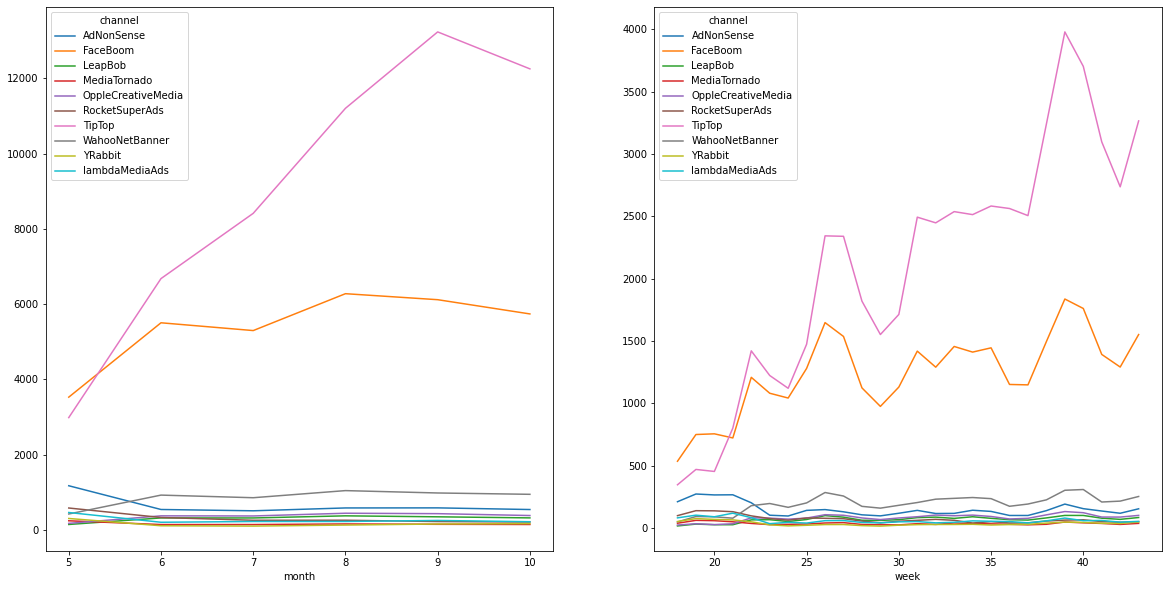

In [28]:
first = costs.pivot_table(
    index=['month'],columns='channel',values='costs',aggfunc='sum'
)
second = costs.pivot_table(
    index=['week'],columns='channel',values='costs',aggfunc='sum'
)
plt.subplots(figsize = (20, 10))
first.plot(ax=plt.subplot(1,2,1))
second.plot(ax=plt.subplot(1,2,2))
plt.show()

#### Вывод:
В разбивке по месяцам видно, что количество денег на рекламу в TipTop стремительно росло. реклама в FaceBoom почти не менялась. Все остальные каналы привлечения примерно равны по количеству вложенных денег.

В разбивке по неделям можно заметить, что графики FaceBook и TipTip схожи по форме. Компания ведёт одинаковую стратегию по вложению средств в рекламу по этим двум каналам.


## Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [29]:
profiles.groupby('channel').agg({'acquisition_cost':'mean'}).sort_values('acquisition_cost')

acquisition_cost
channel                             
organic                     0.000000
LeapBob                     0.210172
MediaTornado                0.218717
YRabbit                     0.218975
OppleCreativeMedia          0.250000
RocketSuperAds              0.412095
WahooNetBanner              0.602245
lambdaMediaAds              0.724802
AdNonSense                  1.008054
FaceBoom                    1.113286
TipTop                      2.799003

#### Вывод:
Средняя стоимость пользователя TipTop примерно в 2,5 раза больше, чем у его ближайшего (по CAC) конкуретна FaceBoom.

# Шаг 5. Оцените окупаемость рекламы

## Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.


####  Органических пользователей не беру.

#### Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [30]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14 

In [31]:
ltv_raw, ltv_grouped, ltv_history,  roi_grouped, roi_history = (
    get_ltv(profiles,orders,observation_date,horizon_days)
)


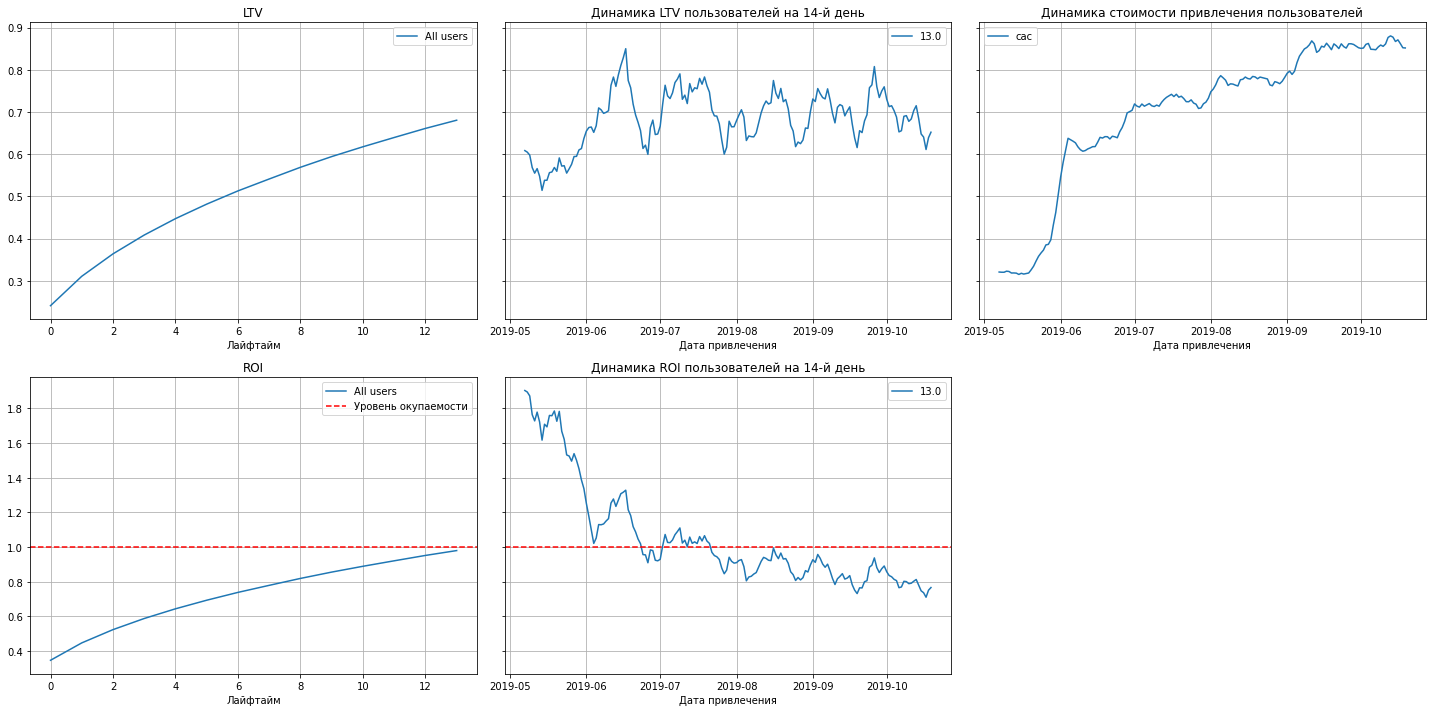

In [32]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

#### Вывод:
По графику ROI видно, что к концу второй недели ROI < 100% => Реклама не окупается.
Резкий скачок в шестом месяце на графике CAC. 
Также резкий обрыв на графике Динамика ROI пользователей на 14-й день.
Скорее всего, проблема в резком повышении цены привлечения пользователя CAC.

<div class="alert alert-info">
    <h2> Мой комментарий_V1<a class="tocSkip"> </h2>
Я оставлю предыдущий код, который учитывал органический трафик.(Чтобы посмотреть на разницу) После него буду рассчитывать метрики, строить графики без учёта органического трафика.

In [33]:
profiles_no_organic = profiles.query('channel != "organic"')

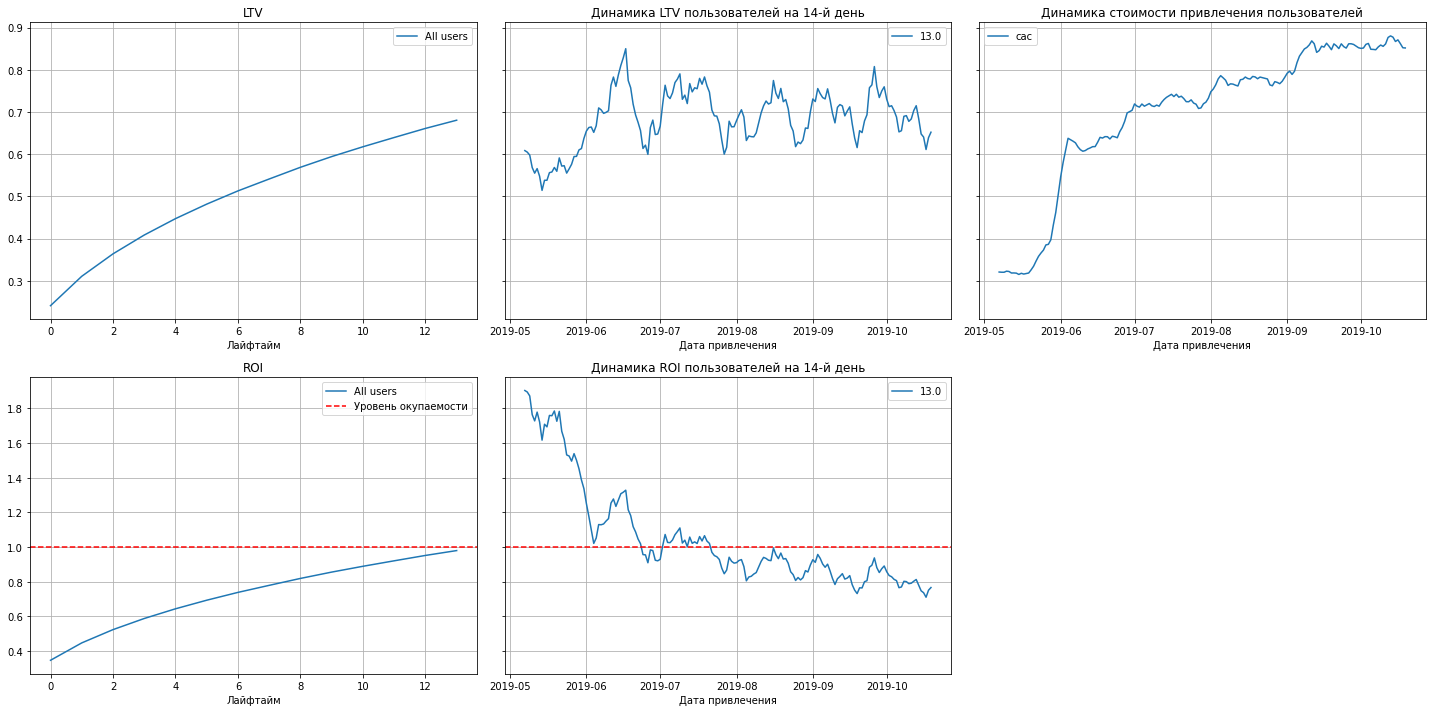

In [34]:
ltv_raw, ltv_grouped, ltv_history,  roi_grouped, roi_history = (
    get_ltv(profiles,orders,observation_date,horizon_days)
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)


        
<div class="alert alert-info">
    <h2> Мой комментарий_V1<a class="tocSkip"> </h2>

 Без учёта органического трафика.

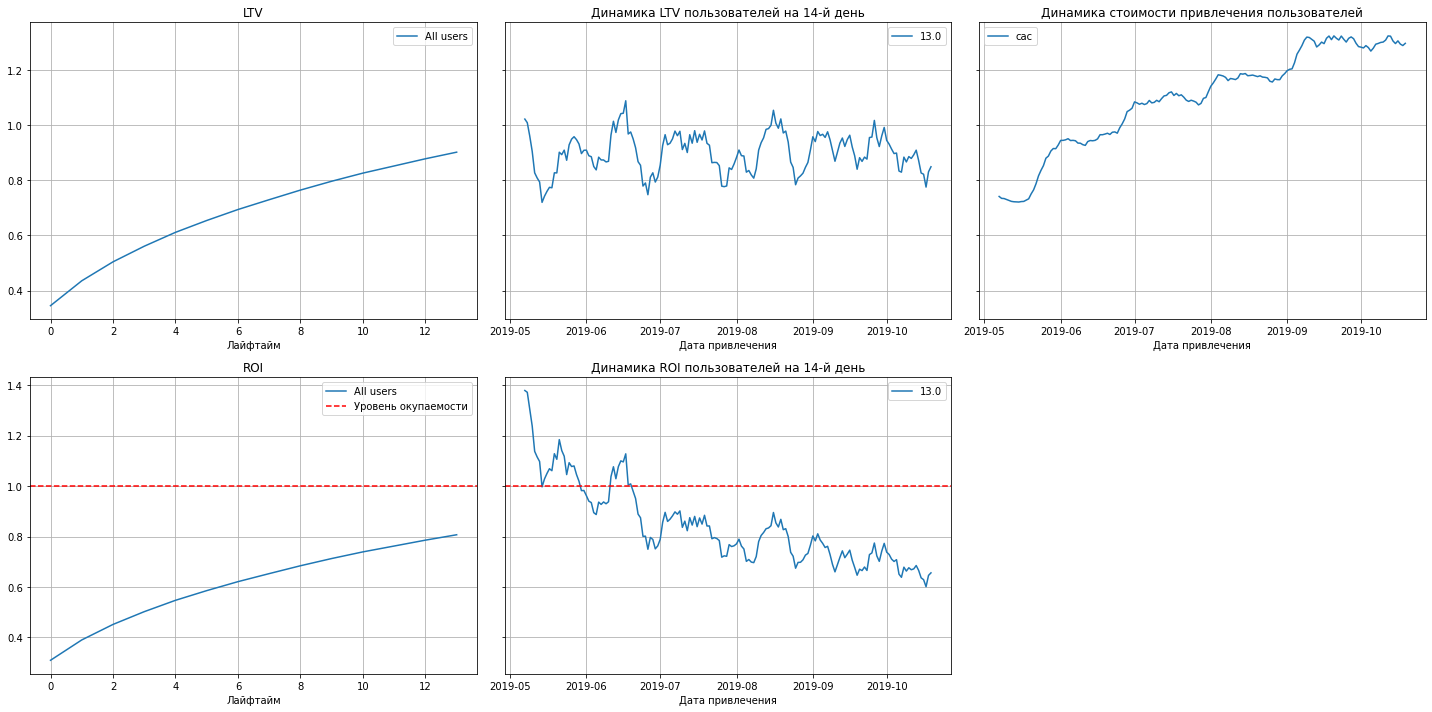

In [35]:
ltv_raw, ltv_grouped, ltv_history,  roi_grouped, roi_history = (
    get_ltv(profiles_no_organic,orders,observation_date,horizon_days)
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

<div class="alert alert-info">
    <h2> Мой комментарий_V1<a class="tocSkip"> </h2>
Действительно значение ROI стало ещё меньше.

<div class="alert alert-info">
    <h2> Мой комментарий_V1<a class="tocSkip"> </h2>
Добавлю графики конверсии и удержания.

## Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.

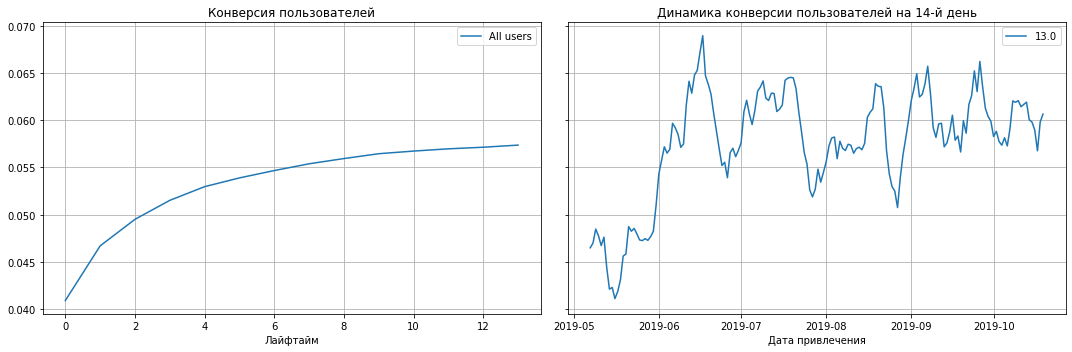

In [36]:
conversion_raw, conversion_grouped, conversion_history = (
    get_conversion(profiles,orders,observation_date,horizon_days,ignore_horizon=False)
)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 


<div class="alert alert-info">
    <h2> Мой комментарий_V1<a class="tocSkip"> </h2>

 Без учёта органического трафика.

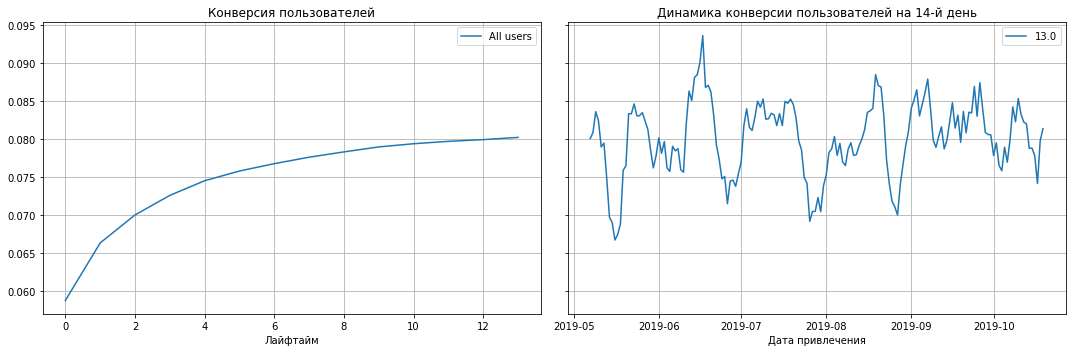

In [37]:
conversion_raw, conversion_grouped, conversion_history = (
    get_conversion(profiles_no_organic,orders,observation_date,horizon_days,ignore_horizon=False)
)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

<div class="alert alert-info">
    <h2> Мой комментарий_V1<a class="tocSkip"> </h2>

Значение конверсии стало выше.
Вывод:
Конверсия составляет примерно 8%.

#### Вывод:
По графику конверсия пользователей: Конверсия от 5,5% до 6%.
По динамике конверсии виден очень сильный спад конверсии в середине 5-го месяца. После этого резкий скачок (в 6-ом месяце)

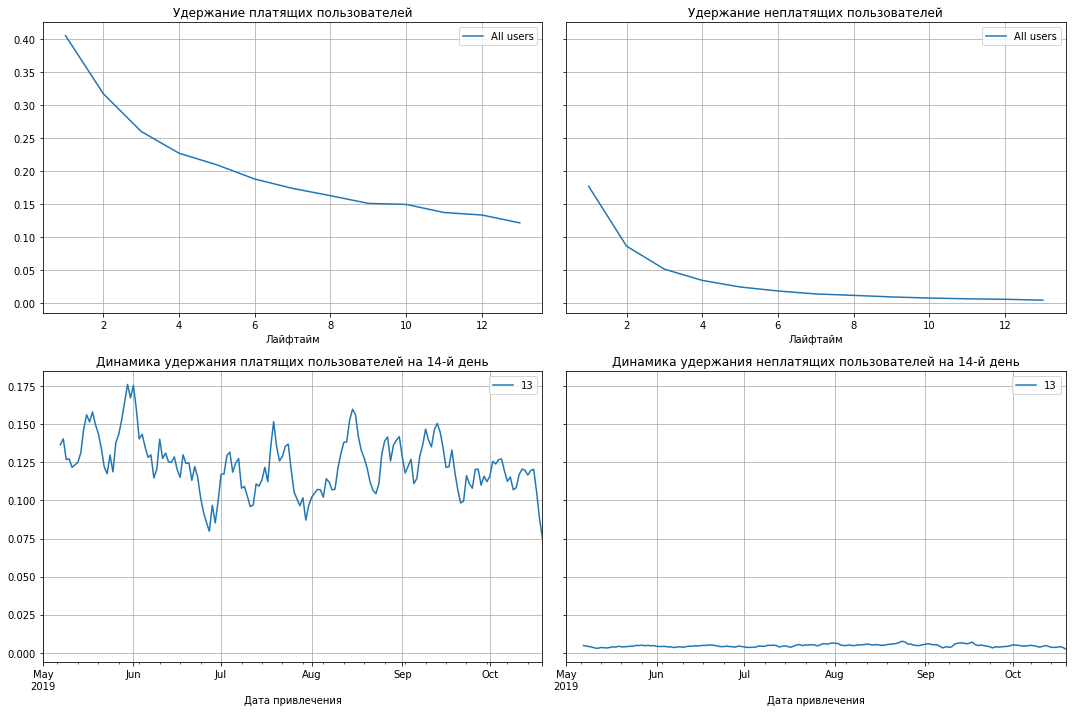

In [38]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

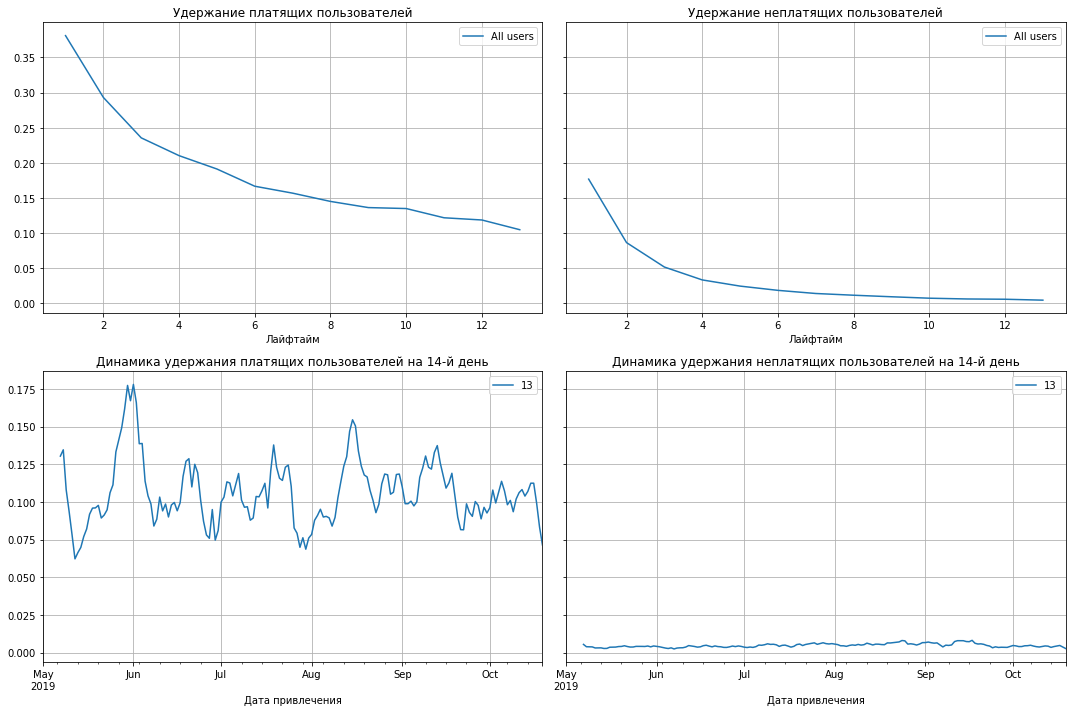

In [39]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no_organic, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)

<div class="alert alert-info">
    <h2> Мой комментарий_V1<a class="tocSkip"> </h2>
Удержание стало немного меньше, примерно на 2,5%.

#### Вывод:
Удержание неплатящих пользователей оставляет желать лучшего.

## Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [40]:
dimensions = ['device']

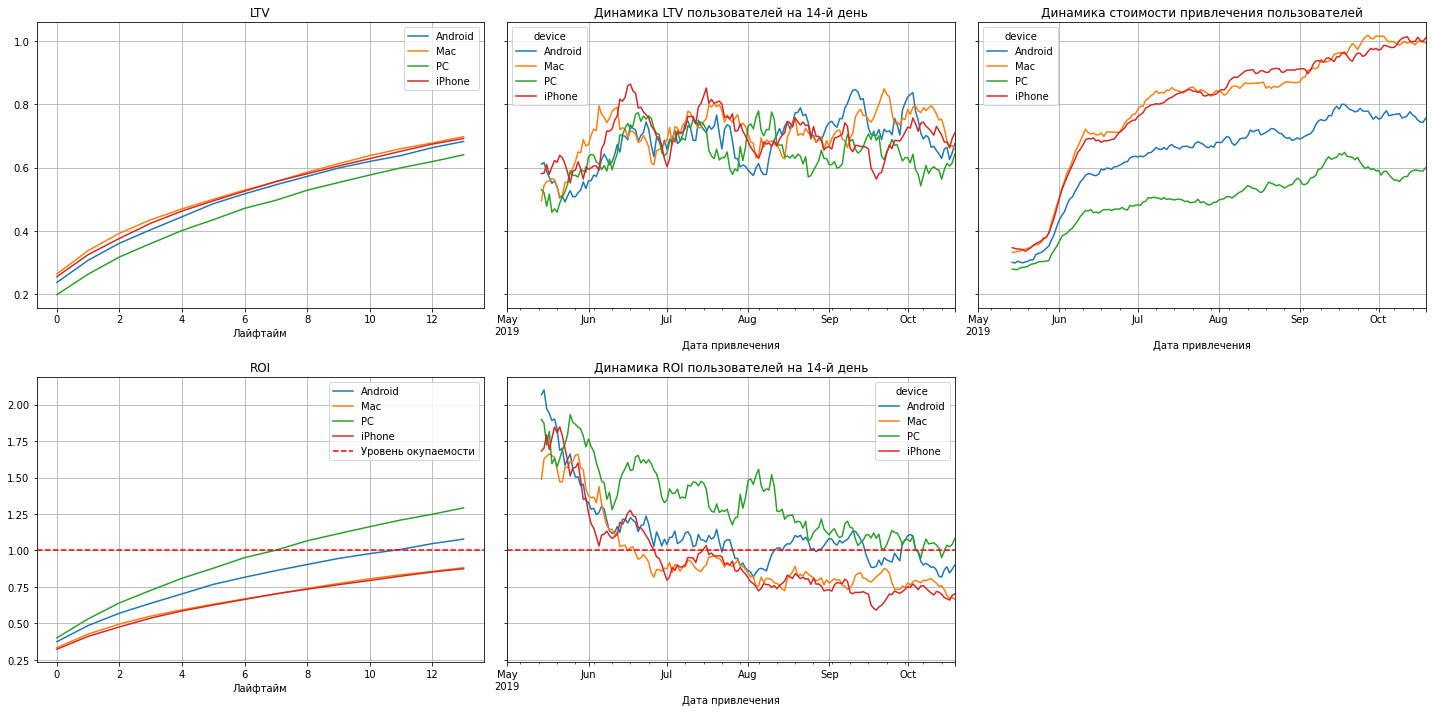

In [41]:
ltv_raw, ltv_grouped, ltv_history,  roi_grouped, roi_history = (
    get_ltv(profiles,orders,observation_date,horizon_days,dimensions=dimensions)
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days,window=14)

<div class="alert alert-info">
    <h2> Мой комментарий_V1<a class="tocSkip"> </h2>
Без учёта органического трафика

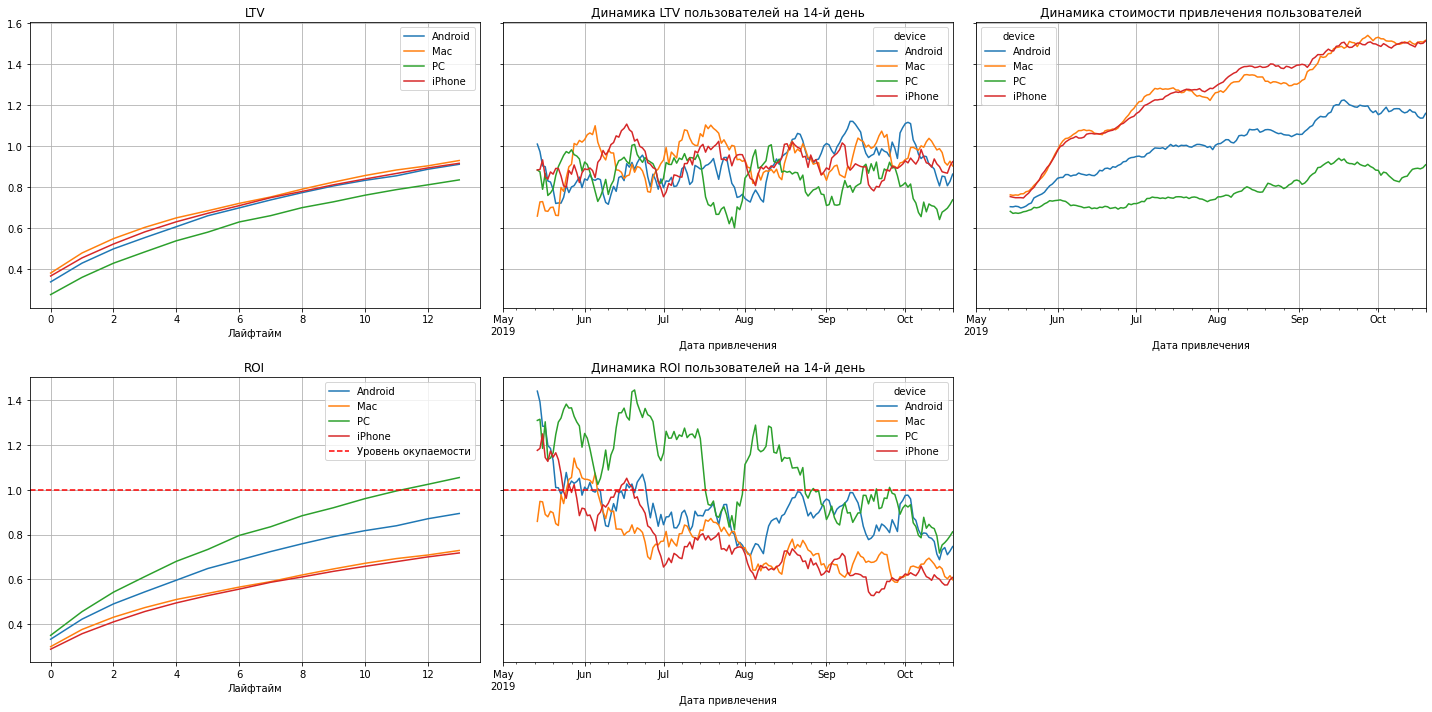

In [42]:
ltv_raw, ltv_grouped, ltv_history,  roi_grouped, roi_history = (
    get_ltv(profiles_no_organic,orders,observation_date,horizon_days,dimensions=dimensions)
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days,window=14)

<div class="alert alert-info">
    <h2> Мой комментарий_V1<a class="tocSkip"> </h2>
Значение LTV у всех устройств, кроме PC, равны друг другу. У PC LTV меньше, чем у Android,Max,iPhone.
Стоимость привлечения CAC у iPhone,Mac больше Android,PC.
Оказалось, что окупается реклама лишь PC.

<div class="alert alert-info">
    <h2> Мой комментарий_V1<a class="tocSkip"> </h2>
Конверсия и Удержание.

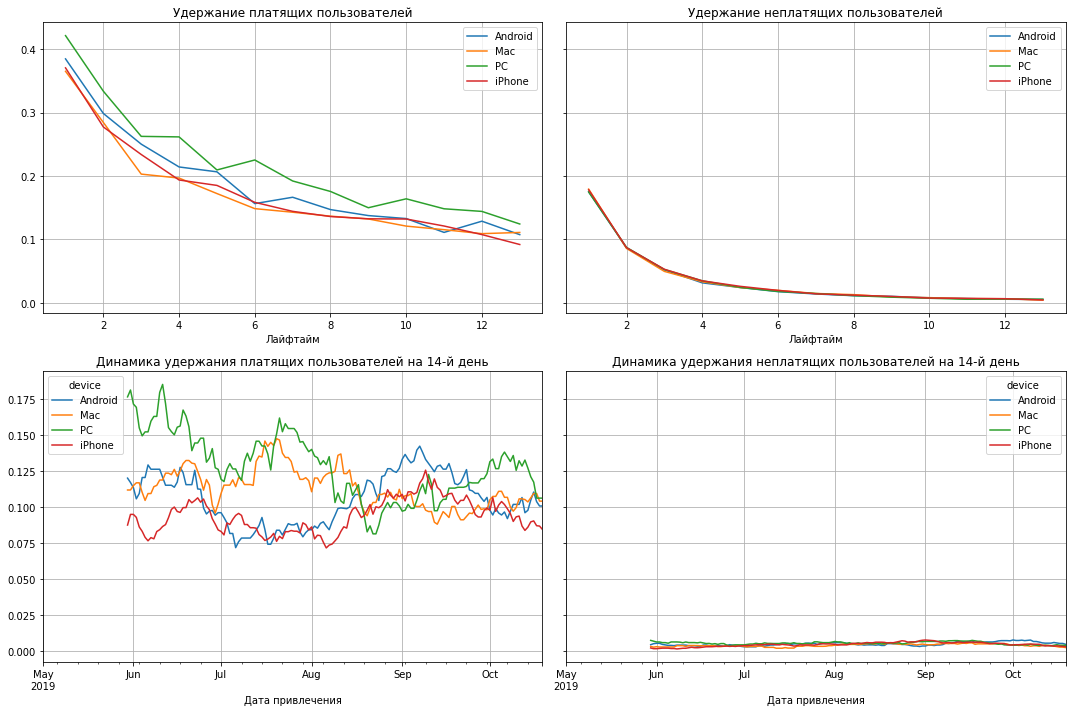

In [43]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no_organic, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days,window=30) 

<div class="alert alert-info">
    <h2> Мой комментарий_V1<a class="tocSkip"> </h2>
Удержание неплатящих пользователей равно на всех устройствах.
Удержание платящих тоже примерно равно.

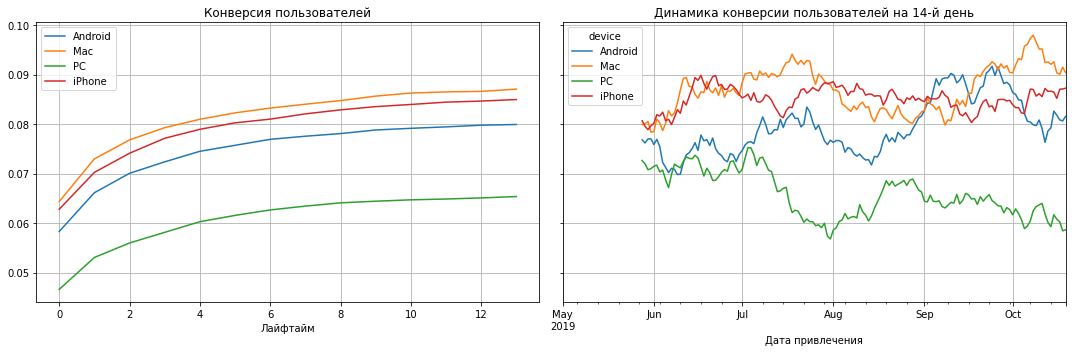

In [44]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_no_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days,window=28) 

<div class="alert alert-info">
    <h2> Мой комментарий_V1<a class="tocSkip"> </h2>
        Заметно выделяется конверсия у PC, которая меньше, чем на остальных устройствах.

<div class="alert alert-info">
    <h2> Мой комментарий_V1<a class="tocSkip"> </h2>
Выводы в разрезе по устройству(без учёта органического графика): <p>
Оказалось, что окупается лишь реклама для PC.<p>
Удержание платящих пользователей примерно равное.<p>
Конверсия меньше всего у PC, Mac и iPhone лидируют по этому показателю. <p>
 ROI по всем устройствам падает, начиная с июня, а стоимость привлечения CAC неизменно растет. Особенно дорого для нас обходятся пользователи с устройств Apple

#### Вывод:
Реклама окупается на PC,Android. iPhone и Mac не окупаются.</p>
Самый низкий CAC у PC.</p>
На графике динамики ROI заметно, что до 6 месяца все устройства находились выше уровня окупаемости.</p>
LTV у всех устройств примерно равен. PC уступает остальным по LTV.</p>
Видимо беда в резком повышении CAC в конце 5-го месяца.</p>

## Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [45]:
dimensions = ['region']

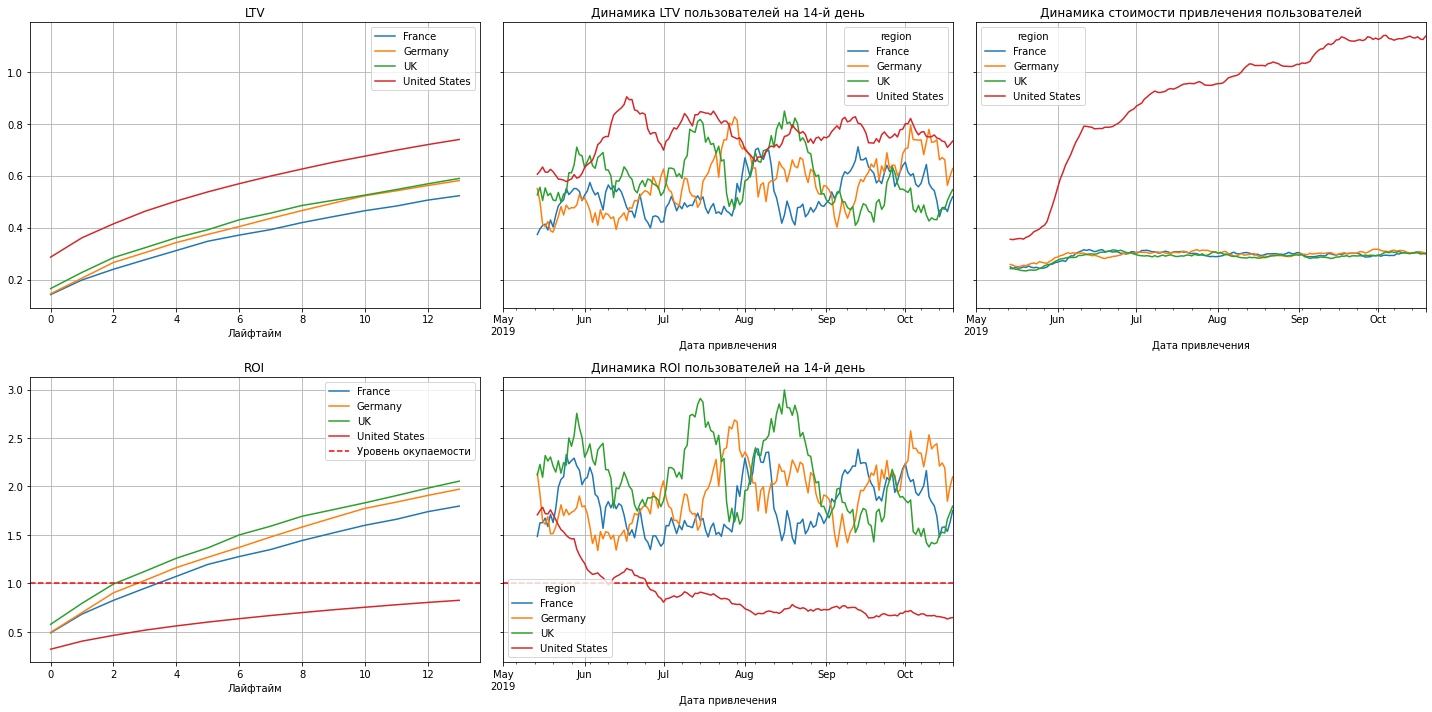

In [46]:
ltv_raw, ltv_grouped, ltv_history,  roi_grouped, roi_history = (
    get_ltv(profiles,orders,observation_date,horizon_days,dimensions=dimensions)
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days,window=14)

<div class="alert alert-info">
    <h2> Мой комментарий_V1<a class="tocSkip"> </h2>
Без учёта органического трафика

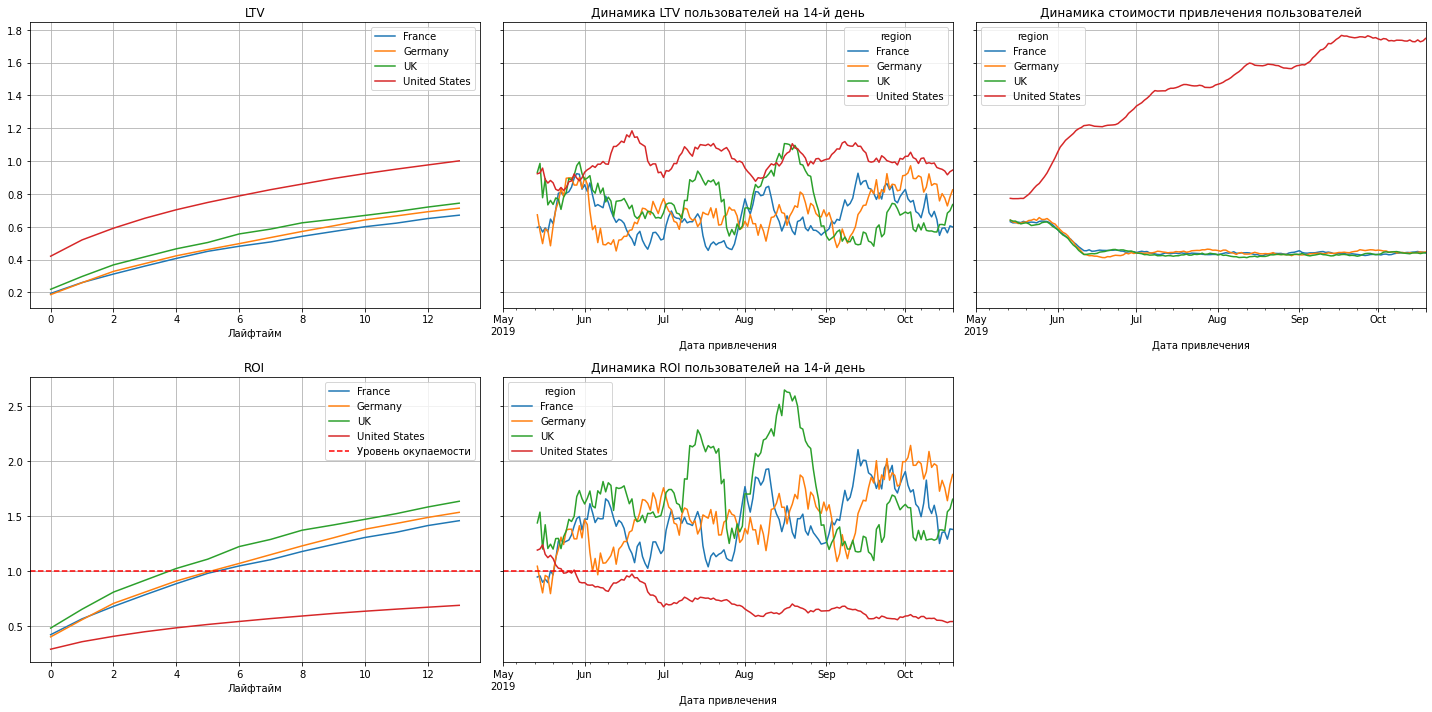

In [47]:
ltv_raw, ltv_grouped, ltv_history,  roi_grouped, roi_history = (
    get_ltv(profiles_no_organic,orders,observation_date,horizon_days,dimensions=dimensions)
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days,window=14)

<div class="alert alert-info">
    <h2> Мой комментарий_V1<a class="tocSkip"> </h2>
Оказалось, что с начала июня стоимость привлечения CAC уменьшилась для France,Germany,UK.<p>

<div class="alert alert-info">
    <h2> Мой комментарий_V1<a class="tocSkip"> </h2>
Конверсия и Удержание.

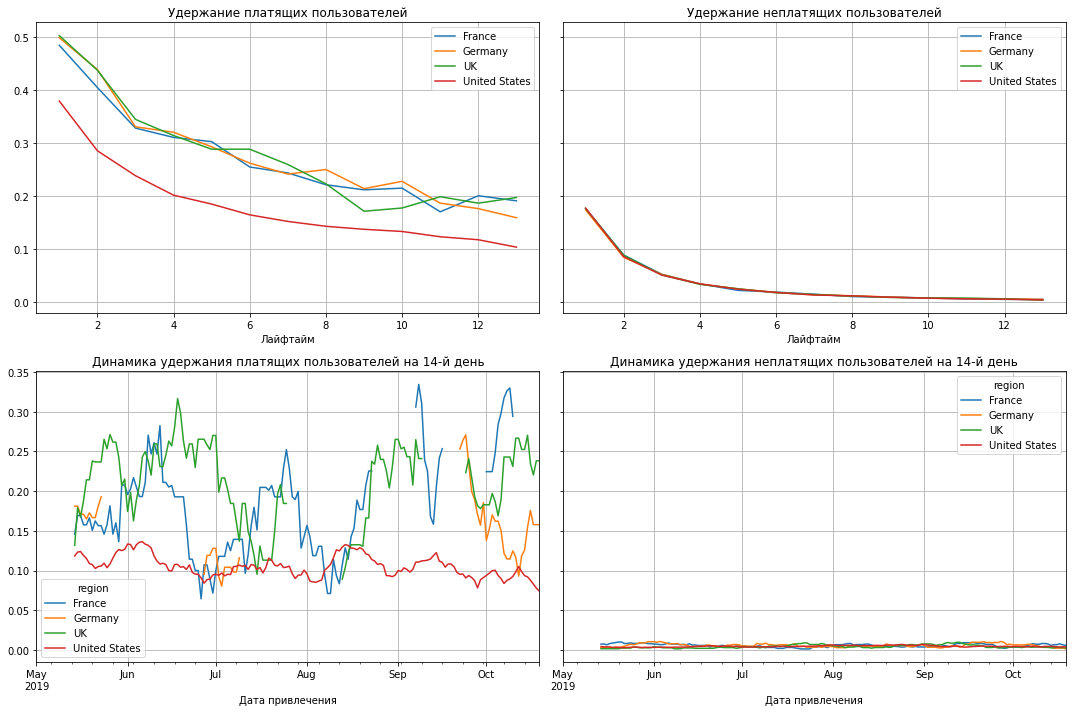

In [48]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days,window=14) 

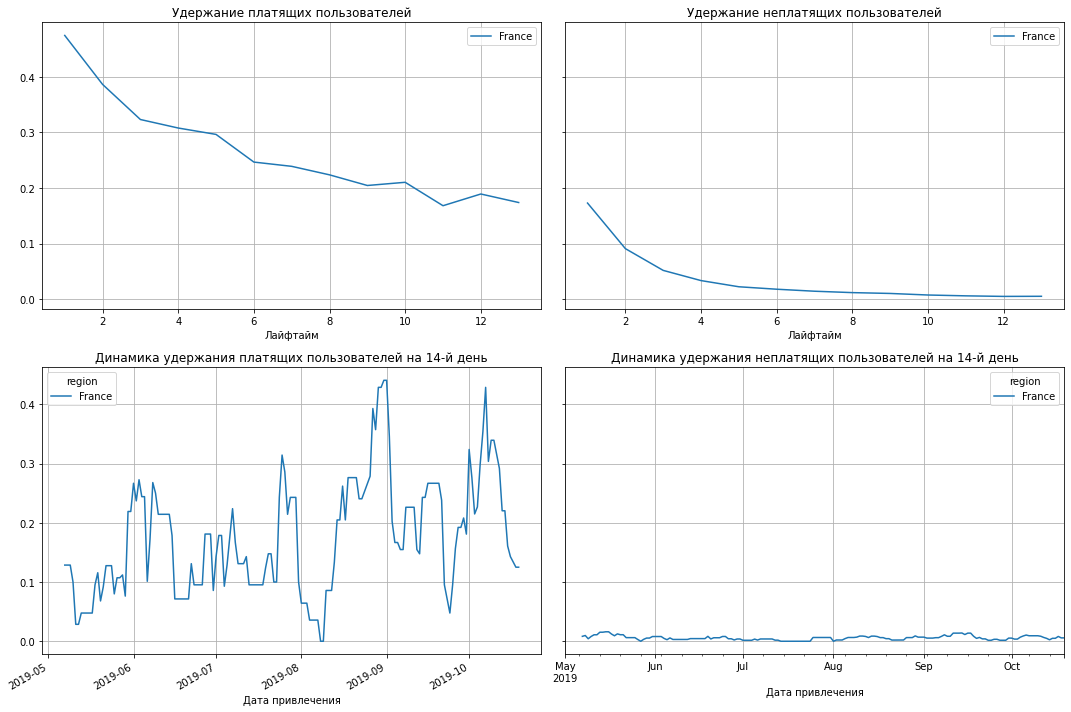

In [49]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no_organic.query('region in ("France")'), visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

#### Вывод:
Из графика LTV: LTV United States больше, чем у остальных регионов. LTV Germany ~ LTV UK, На последнем месте LTV France </p>
ИЗ графика Динамика LTV: LTV US на 14-й день начало расти, достигло пика в середине 6-го месяца.  </p>
ИЗ графика CAC: CAC у France,Germany,UK примерно равна. US в начале 6-го месяца начала быстро расти. </p>
ИЗ графика ROI: Окупаются все регионы, кроме US.</p>
ИЗ графика Динамика ROI: Всё шло хорошо, до 6-го месяца, когда реклама в регионе US перестала окупаться. </p>

<div class="alert alert-info">
    <h2> Мой комментарий_V1<a class="tocSkip"> </h2>
Почему-то график Динамика удержания пользователей на 14 дней отображается с пробелами. Если строить отдельно по каждому региону, то всё вроде бы нормально.
Удержание неплатящих во всех регионах одинаковое.
Удержание платящих в US заметно меньше, чем в остальных регионах. Возможно в этом и состоит причина неокупаемости рекламы в этом регионе. Посмотрим на конверсию.

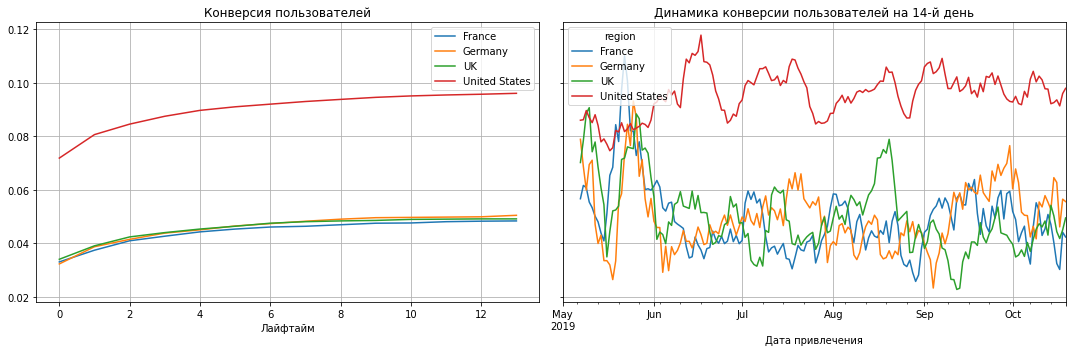

In [50]:
conversion_raw, conversion_grouped, conversion_history = (
    get_conversion(profiles_no_organic,orders,observation_date,horizon_days,dimensions=dimensions,ignore_horizon=False)
)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

<div class="alert alert-info">
    <h2> Мой комментарий_V1<a class="tocSkip"> </h2>
Конверсия региона US почти в 2 раза больше, чем у остальных регионов!

<div class="alert alert-info">
    <h2> Мой комментарий_V1<a class="tocSkip"> </h2>
Вывод в разрезе по регионам(без учёта органического трафика):<p>
Оказалось, что с начала июня стоимость привлечения CAC у France,Germany,UK.<p>
Удержание платящих пользователей у региона US ниже, чем у остальных регионов. Возможно в этом и причина убытков с рекламы в этом регионе <p>
В то же время конверсия UK выше, чем у остальных регионов.<p>

## Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [51]:
dimensions = ['channel']

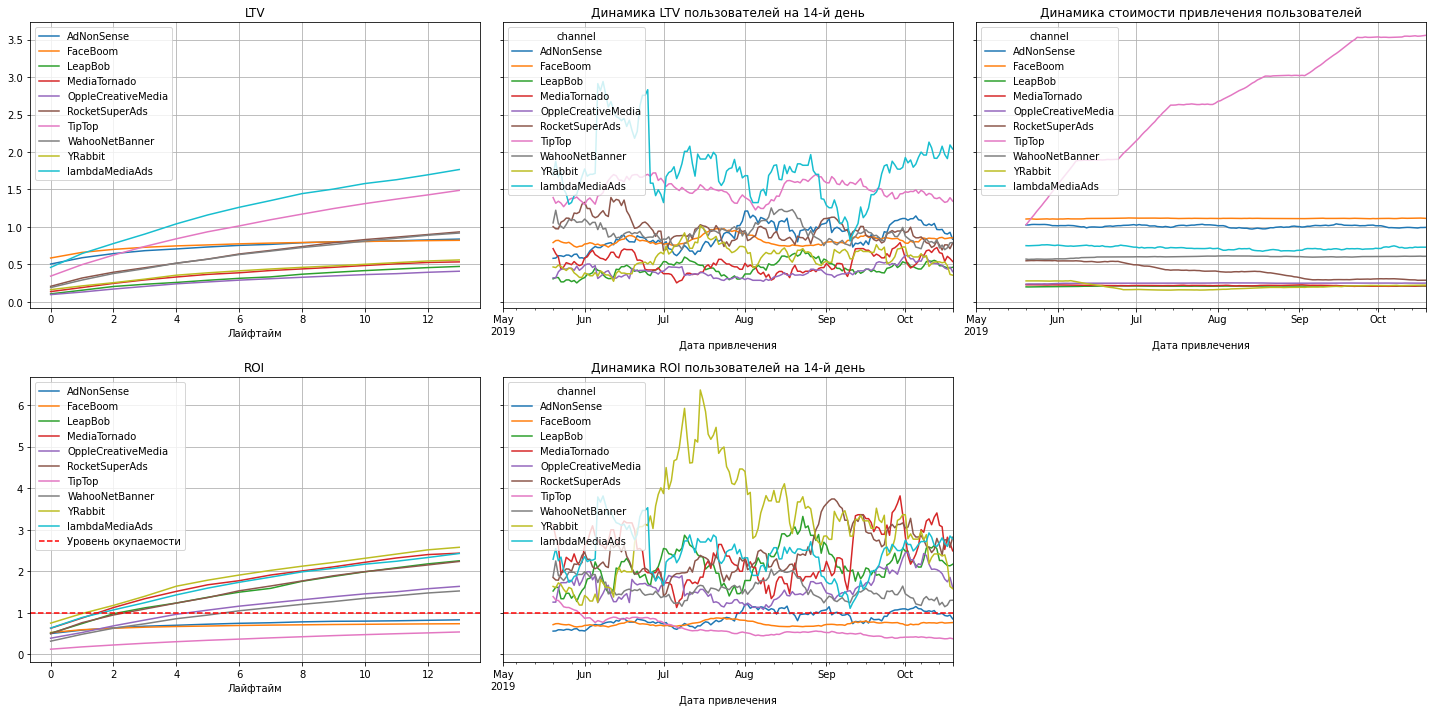

In [52]:
ltv_raw, ltv_grouped, ltv_history,  roi_grouped, roi_history = (
    get_ltv(profiles.query('channel not in ("organic")'),orders,observation_date,horizon_days,dimensions=dimensions)
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days,window=20)

In [53]:
profiles_first_half = profiles.query('channel in ("AdNonSense","FaceBoom","LeapBob","MediaTornado","OppleCreativeMedia")')
profiles_first_half

user_id            first_ts             channel   device  \
0             599326 2019-05-07 20:58:57            FaceBoom      Mac   
1            4919697 2019-07-09 12:46:07            FaceBoom   iPhone   
3           22593348 2019-08-22 21:35:48          AdNonSense       PC   
7           46006712 2019-06-30 03:46:29          AdNonSense  Android   
8           58263264 2019-05-11 19:18:43            FaceBoom   iPhone   
...              ...                 ...                 ...      ...   
149991  999895427370 2019-09-19 23:31:53            FaceBoom  Android   
149992  999902143453 2019-09-17 20:28:14  OppleCreativeMedia   iPhone   
149993  999904695968 2019-05-19 01:29:17            FaceBoom      Mac   
150001  999949280903 2019-08-12 06:47:27            FaceBoom      Mac   
150006  999979924135 2019-09-28 21:28:09        MediaTornado       PC   

               region          dt      month  payer  acquisition_cost  
0       United States  2019-05-07 2019-05-01   True          1.088172  
1       United States  2019-07-09 2019-07-01  False          1.107237  
3             Germany  2019-08-22 2019-08-01  False          0.988235  
7              France  2019-06-30 2019-06-01   True          1.008000  
8       United States  2019-05-11 2019-05-01  False          1.128205  
...               ...         ...        ...    ...               ...  
149991  United States  2019-09-19 2019-09-01   True          1.093252  
149992             UK  2019-09-17 2019-09-01  False          0.261905  
149993  United States  2019-05-19 2019-05-01  False          1.109483  
150001  United States  2019-08-12 2019-08-01  False          1.117838  
150006  United States  2019-09-28 2019-09-01  False          0.205714  

[54546 rows x 9 columns]

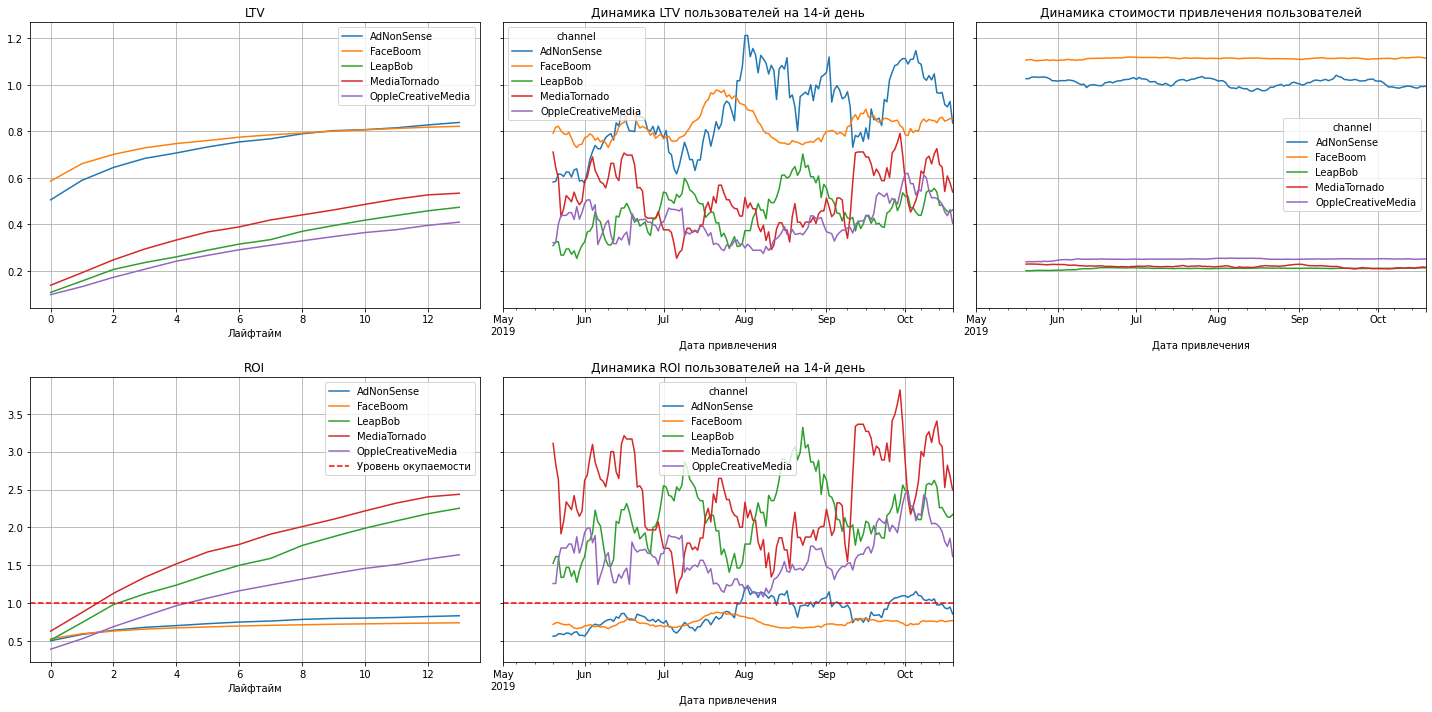

In [54]:
ltv_raw, ltv_grouped, ltv_history,  roi_grouped, roi_history = (
    get_ltv(profiles_first_half,orders,observation_date,horizon_days,dimensions=dimensions)
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days,window=20)

In [55]:
profiles_second_half = profiles.query('channel not in ("AdNonSense","FaceBoom","LeapBob","MediaTornado","OppleCreativeMedia")')
profiles_second_half

user_id            first_ts  channel   device         region  \
2            6085896 2019-10-01 09:58:33  organic   iPhone         France   
4           31989216 2019-10-02 00:07:44  YRabbit   iPhone  United States   
5           34186288 2019-05-09 17:29:23  organic  Android  United States   
6           38448301 2019-08-16 11:56:00  organic  Android  United States   
10          62222884 2019-06-19 15:14:57  organic   iPhone        Germany   
...              ...                 ...      ...      ...            ...   
150002  999954865738 2019-07-25 08:47:56  organic       PC             UK   
150003  999956196527 2019-09-28 08:33:02   TipTop   iPhone  United States   
150004  999975439887 2019-10-21 00:35:17  organic       PC             UK   
150005  999976332130 2019-07-23 02:57:06   TipTop   iPhone  United States   
150007  999999563947 2019-10-18 19:57:25  organic   iPhone  United States   

                dt      month  payer  acquisition_cost  
2       2019-10-01 2019-10-01  False          0.000000  
4       2019-10-02 2019-10-01  False          0.230769  
5       2019-05-09 2019-05-01  False          0.000000  
6       2019-08-16 2019-08-01  False          0.000000  
10      2019-06-19 2019-06-01  False          0.000000  
...            ...        ...    ...               ...  
150002  2019-07-25 2019-07-01  False          0.000000  
150003  2019-09-28 2019-09-01  False          3.500000  
150004  2019-10-21 2019-10-01  False          0.000000  
150005  2019-07-23 2019-07-01  False          2.600000  
150007  2019-10-18 2019-10-01  False          0.000000  

[95462 rows x 9 columns]

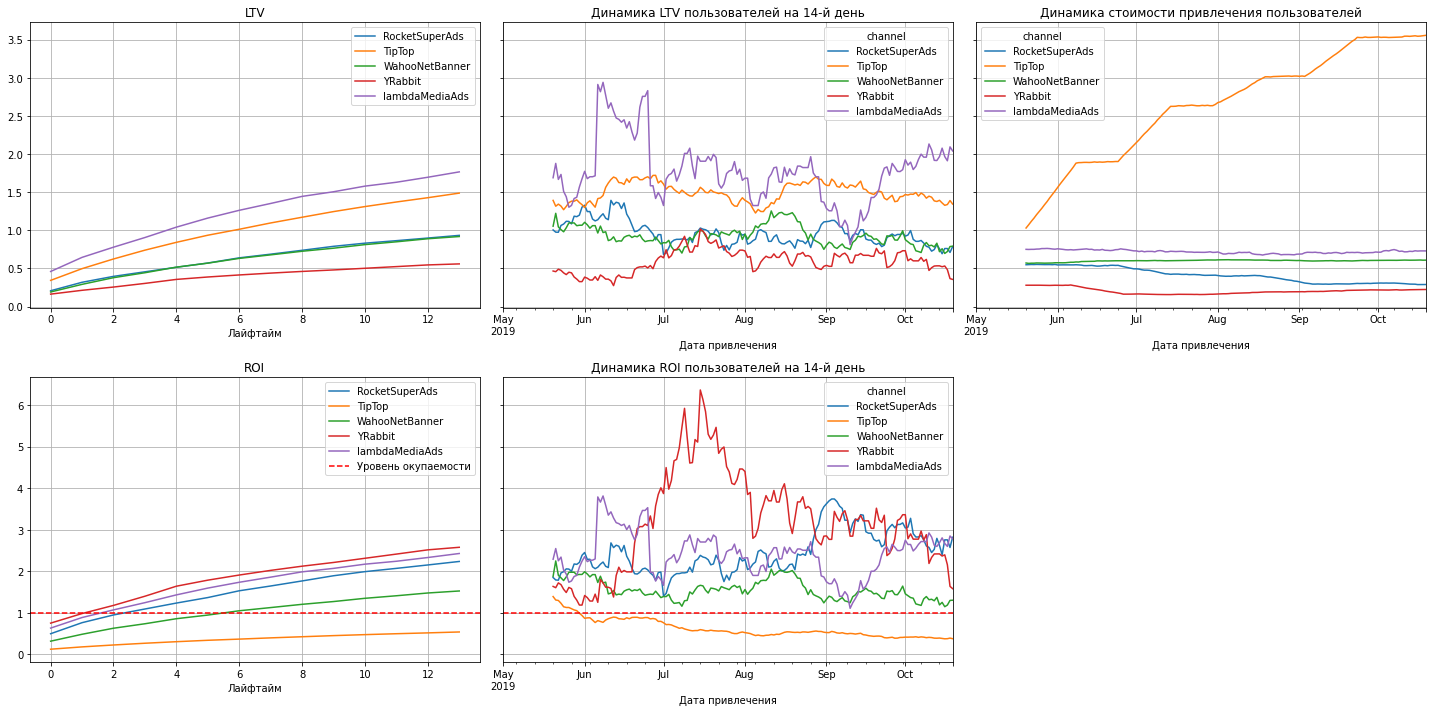

In [56]:
ltv_raw, ltv_grouped, ltv_history,  roi_grouped, roi_history = (
    get_ltv(profiles_second_half.query('channel not in("organic")'),orders,observation_date,horizon_days,dimensions=dimensions)
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days,window=20)

#### Вывод:
Разбил на две части, чтобы было можно что-то рассмотреть.</p>
Хотя даже на общем графике видно, как CAC у канала TipTop стремится к бесконечности. У остальных каналов CAC почти не </p>менялся, у канала RocketSuperAds даже уменьшился.</p>
Реклама не окупилась по каналам TipTop,FaceBoom,AdNonSense. По всем остальным окупалась.</p>

<div class="alert alert-info">
    <h2> Мой комментарий_V1<a class="tocSkip"> </h2>
Удержание и конверсия.

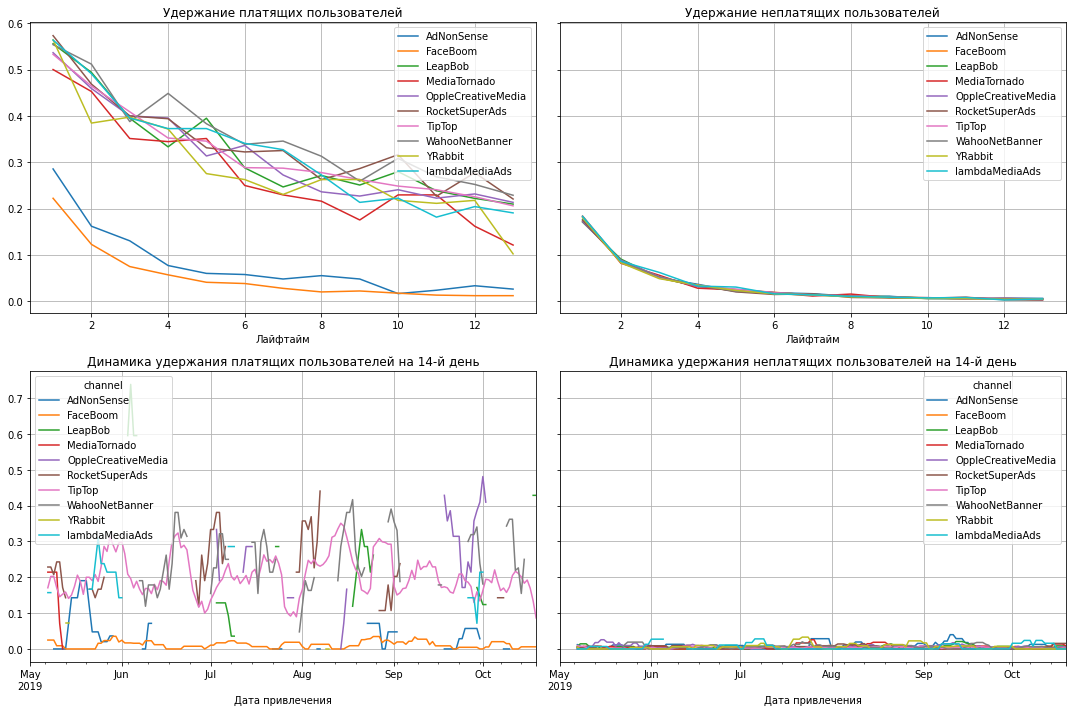

In [57]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no_organic, visits, observation_date, horizon_days,dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days,window=7)

<div class="alert alert-info">
    <h2> Мой комментарий_V1<a class="tocSkip"> </h2>
Очень низкое удержание у FaceBoom и AdNonSense, среди платящих пользователей.<p>
TipTop находится на одном уровне с остальными рекламными каналами.

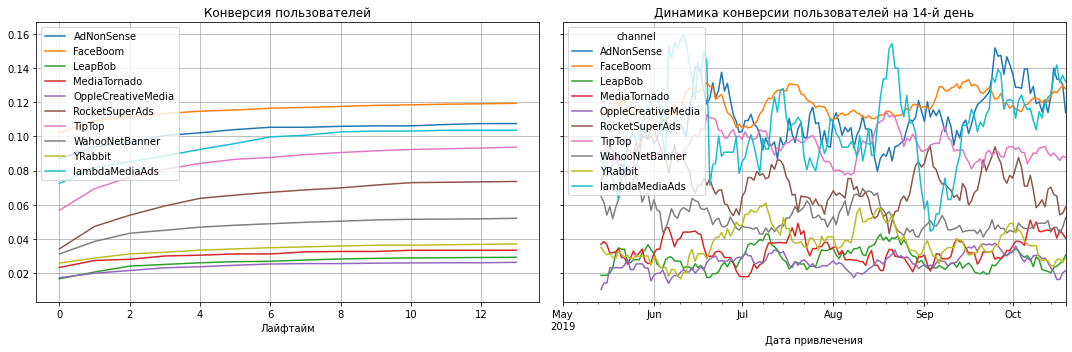

In [58]:
conversion_raw, conversion_grouped, conversion_history = (
    get_conversion(profiles_no_organic,orders,observation_date,horizon_days,dimensions=dimensions,ignore_horizon=False)
)
plot_conversion(conversion_grouped, conversion_history, horizon_days,window=14) 

<div class="alert alert-info">
    <h2> Мой комментарий_V1<a class="tocSkip"> </h2>
Выводы: <p>
Оказалось, что конверсия у FaceBoom на первом месте, среди всех каналов привлечения. Целых 12% конверсия! (на 14 день)


## Ответьте на такие вопросы:
### Окупается ли реклама, направленная на привлечение пользователей в целом?

В целом, реклама не окупается. (ИЗ общего графика LTV,CAC,ROI)

### Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?

Негативно проявили себя следующие устройства: Mac,iPhone. </p>
Страны : United States. </p>
Рекламные каналы: TipTip,FaceBoom,AdNonSense.</p>

### Чем могут быть вызваны проблемы окупаемости?

Во всех рассмотренных случаях LTV вёл себя ожидаемо, без резкий изменений. На ROI влияет также CAC, резкое его повышение негативно сказывалось на ROI.  



# Шаг 6. Напишите выводы

### Выделите причины неэффективности привлечения пользователей.
### Сформулируйте рекомендации для отдела маркетинга.

В сумме, расходы на каналы TipTop,FaceBoom,AdNonSense составили 91108,15 (условных денег), что составляет 86% от всего рекламного бюджета за эти полгода. Хоть и процент платящих пользователей с этих каналов составляет 9.6% , 12.2% , 11,3% соответственно, но реклама по этим каналам не окупилась. </p>
Вложение в эти каналы лишь ухудшило ситуацию. </p>
Стоит рассмотреть другие, с наибольшим ROI. Например YRabbit или MediaTomado

Нужно что-то делать с регионом US этот регион имеет наибольший процент платящих пользователей. Количество пользователей в US составляет 66% от всех наших пользователей. Этот регион окупался лишь до середины 6-го месяца, после чего реклама не окупалась. LTV этого региона и так выше, чем у остальных, так что нужно уменьшать CAC.

Возможна связь между неокупаемой рекламой в регионе US и неокупаемой рекламой для устройств iPhone и Mac. Поскольку большой процент населения US пользуется данными устройствами.

Также следует обратить внимание на удержание неплатящих пользователей.

<div class="alert alert-info">
    <h2> Мой комментарий_V1<a class="tocSkip"> </h2>
Посмотрим на все показатели отдельно в US.

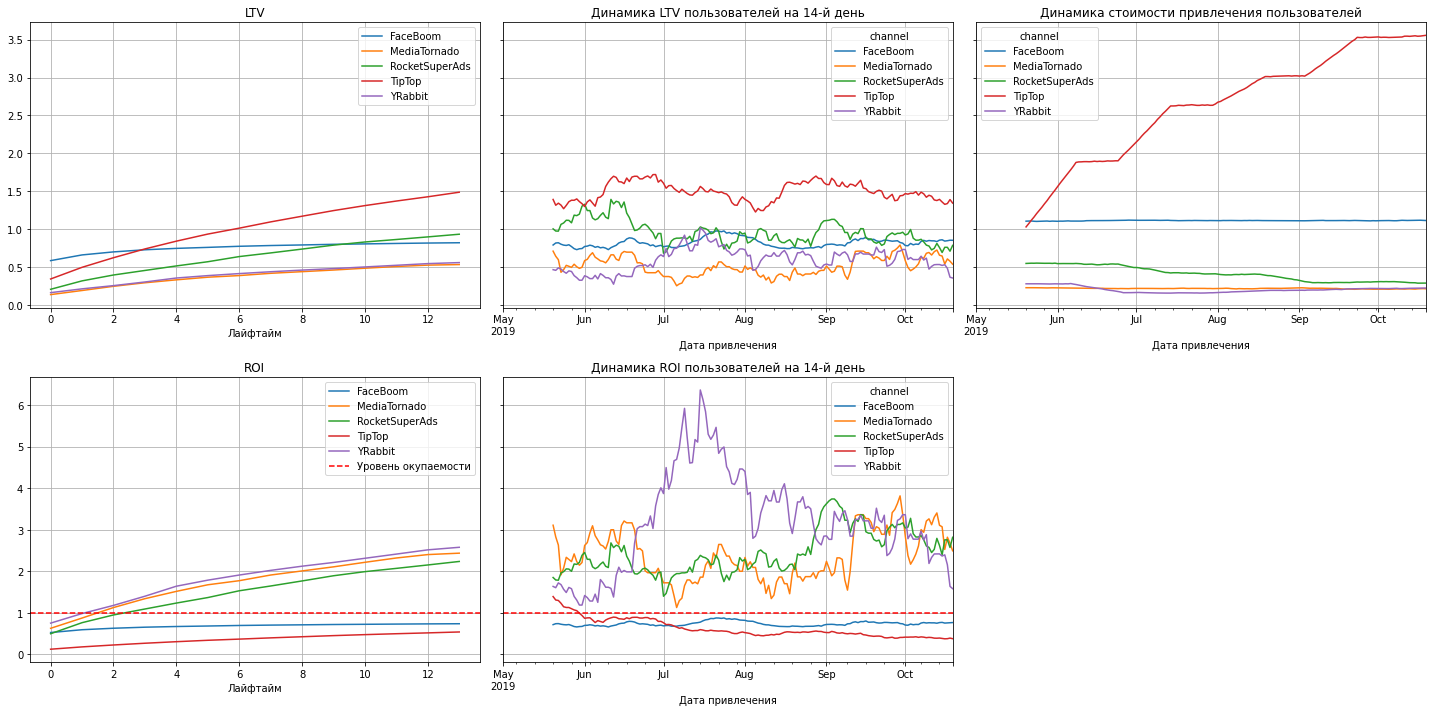

--------------------------------------------------------------------------------------------


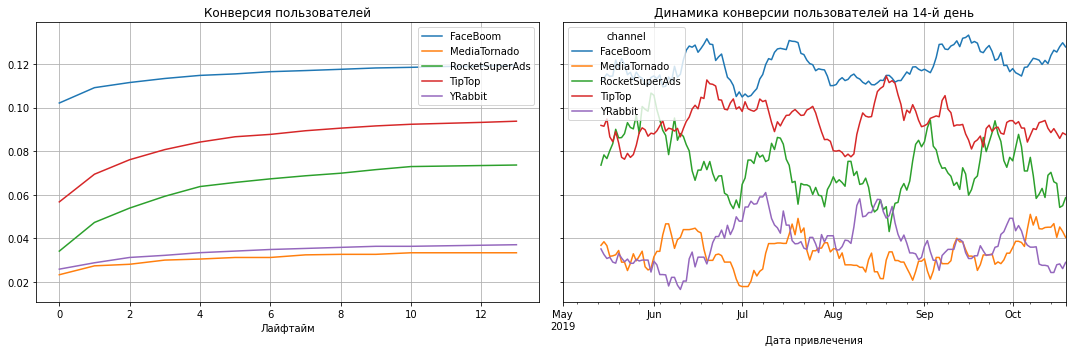

--------------------------------------------------------------------------------------------


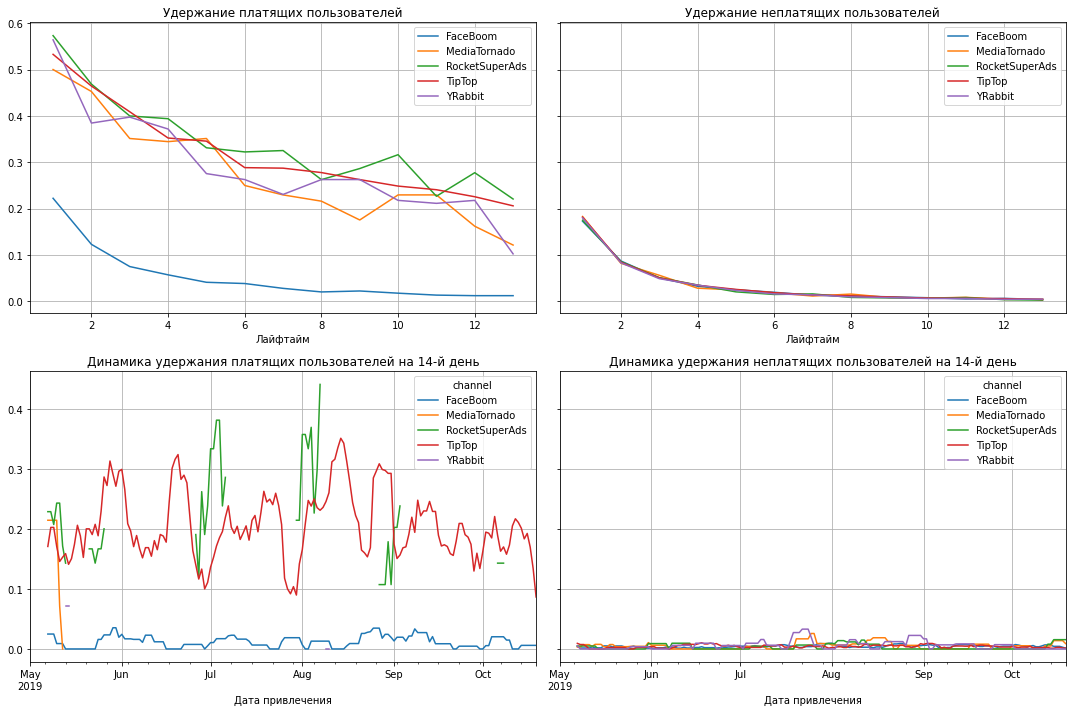

--------------------------------------------------------------------------------------------


In [59]:
dimensions=['channel']
ltv_raw, ltv_grouped, ltv_history,  roi_grouped, roi_history = (
    get_ltv(profiles_no_organic.query('region == "United States"'),orders,observation_date,horizon_days,dimensions=dimensions)
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days,window=20)
print("--------------------------------------------------------------------------------------------")
conversion_raw, conversion_grouped, conversion_history = (
    get_conversion(profiles_no_organic.query('region == "United States"'),orders,observation_date,horizon_days,dimensions=dimensions,ignore_horizon=False)
)

plot_conversion(conversion_grouped, conversion_history, horizon_days,window=14)
print("--------------------------------------------------------------------------------------------")
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no_organic.query('region == "United States"'), visits, observation_date, horizon_days,dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days,window=7)
print("--------------------------------------------------------------------------------------------")

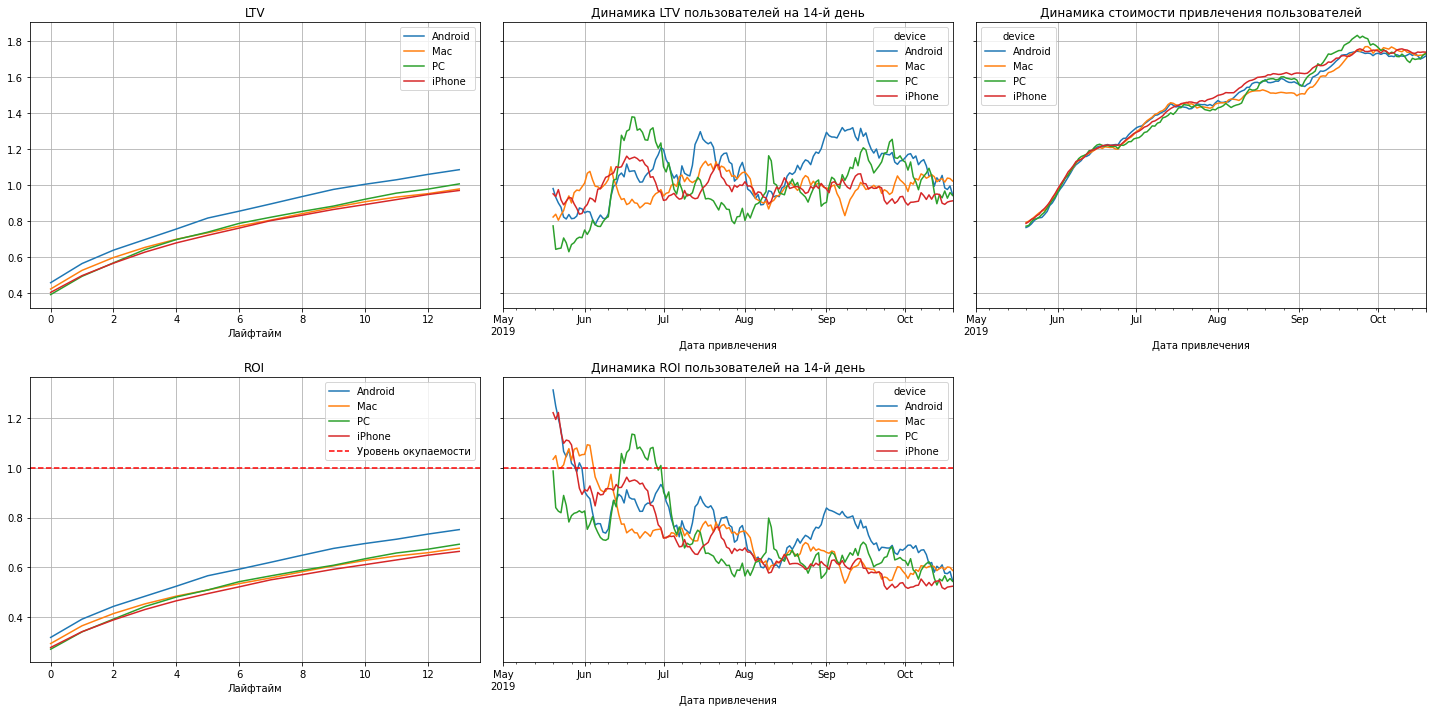

--------------------------------------------------------------------------------------------


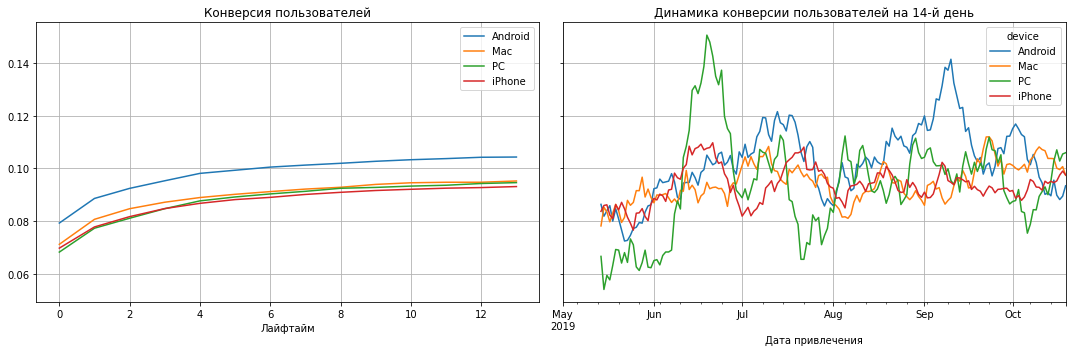

--------------------------------------------------------------------------------------------


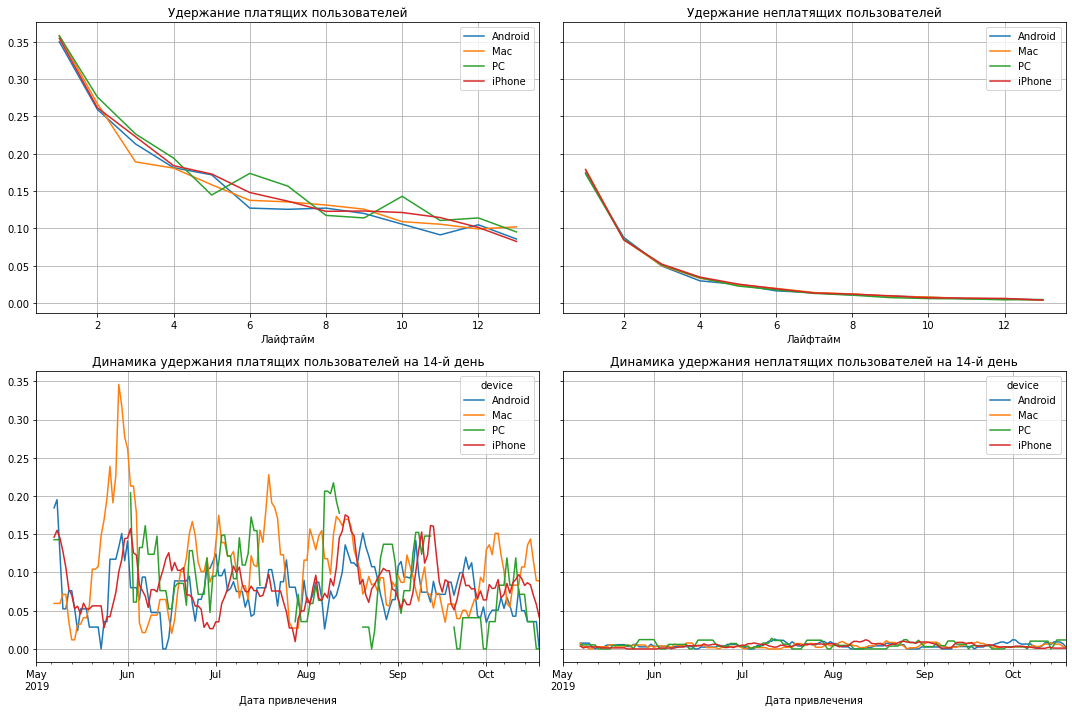

--------------------------------------------------------------------------------------------


In [60]:
dimensions=['device']
ltv_raw, ltv_grouped, ltv_history,  roi_grouped, roi_history = (
    get_ltv(profiles_no_organic.query('region == "United States"'),orders,observation_date,horizon_days,dimensions=dimensions)
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days,window=20)
print("--------------------------------------------------------------------------------------------")
conversion_raw, conversion_grouped, conversion_history = (
    get_conversion(profiles_no_organic.query('region == "United States"'),orders,observation_date,horizon_days,dimensions=dimensions,ignore_horizon=False)
)

plot_conversion(conversion_grouped, conversion_history, horizon_days,window=14)
print("--------------------------------------------------------------------------------------------")
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no_organic.query('region == "United States"'), visits, observation_date, horizon_days,dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days,window=7)
print("--------------------------------------------------------------------------------------------")

Рекомендация: Поскольку наибольшее количество пользователей из US, надо повысить ROI Для iPhone и Mac(уменьшаем CAC/Увеличиваем LTV), для рекламы можно выбрать канал: YRabbit(ROI близится к 260%) или RocketSuperAds. Эти два окупались каждый месяц.

In [61]:
traffic_us = (
    profiles.query('channel != "organic"')
    .groupby('channel').agg({'user_id':'nunique'})
    .sort_values('user_id',ascending=False)
)
traffic_us['%'] = round(traffic_us['user_id'] * 100 / traffic_us['user_id'].sum() ,1)
traffic_us.columns = ['count_users','procent']
traffic_us.style.format({'procent':'{}%'})


In [62]:
traffic_us_device = (
    profiles_no_organic
    .groupby('device').agg({'user_id':'nunique'})
    .sort_values('user_id',ascending=False)
)
traffic_us_device['%'] = round(traffic_us_device['user_id'] * 100/ traffic_us_device['user_id'].sum() ,1)
traffic_us_device.columns = ['count_users','procent']
traffic_us_device.style.format({'procent':'{}%'})

In [63]:
costs.query('month == 6').groupby('channel')['costs'].sum().sort_values()

channel
YRabbit                106.200
MediaTornado           138.000
lambdaMediaAds         199.200
LeapBob                314.580
RocketSuperAds         325.715
OppleCreativeMedia     370.000
AdNonSense             538.650
WahooNetBanner         921.000
FaceBoom              5501.100
TipTop                6675.600
Name: costs, dtype: float64

<div class="alert alert-info">
    <h2> Мой комментарий_V1<a class="tocSkip"> </h2>
Рекомендация: (все выводы сделаны без учёта органического трафика) <p>
Как и прежде, основной проблемой является регион US. <p>
Основные каналы: FaceBoom,TipTop. <p>
Половина пользователей US пришла из каналов FaceBoom и TipTop. Но оба этих канала не окупается. Надо понять почему. <p>
Смотрим на LTV,CAC,ROI по каналу TipTop. LTV растёт, CAC растёт очень быстро. ROI падает. Конверсия и удержание на 14 день составляют соответственно: в среднем 9% ,20%. Графики удержания и конверсии (динамика на 14 день)на начало 6-го месяца не сильно изменялись. Так что я не знаю причин резкого повышения CAC, а повышение привлечения является основной причиной неокупаемости. <p>
Сделаю предположение: Чем больше пользователей хотят привлечь по одному каналу, тем больше становится стоимость привлечения одного пользователя. Если это так, то не нужно пытаться привлечь большее количество пользвателей с одного канала, а распределять деньги на рекламу по нескольким каналам. <p>
        
По каналу FaceBoom ситуация более понятна. LTV почти не растёт. (из-за очень низкого удержания платящих пользователей). CAC этого канала не растёт, конверсия больше всех остальных каналов привлечения. ТАк что нужно понять, почему пользователи, пришедшие с канала FaceBoom так быстро покидают приложение.
        
